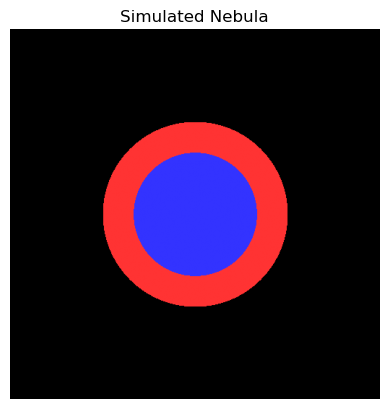

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def generate_nebula_image(width, height):
    # 生成模拟星云图像
    image = np.zeros((width, height, 3))
    
    # 模拟发射星云：红色区域
    rr, cc = np.ogrid[:width, :height]
    mask = (rr - width / 2) ** 2 + (cc - height / 2) ** 2 < (min(width, height) / 4) ** 2
    image[mask] = [1, 0.2, 0.2]  # 红色
    
    # 模拟反射星云：蓝色区域
    mask = (rr - width / 2) ** 2 + (cc - height / 2) ** 2 < (min(width, height) / 6) ** 2
    image[mask] = [0.2, 0.2, 1]  # 蓝色
    
    return image

# 生成图像
image = generate_nebula_image(512, 512)

# 绘制图像
plt.imshow(image)
plt.title('Simulated Nebula')
plt.axis('off')
plt.show()
plt.close()

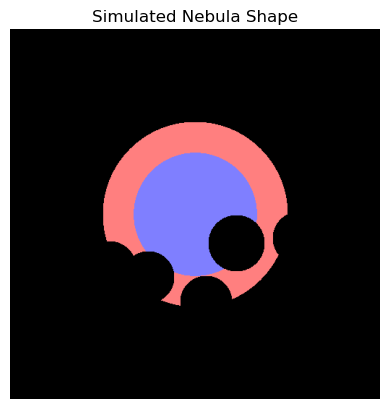

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_nebula_shape():
    # 生成随机的星云形状
    width, height = 512, 512
    image = np.zeros((width, height, 3))

    # 发射星云（泡沫状）
    rr, cc = np.ogrid[:width, :height]
    mask = (rr - width / 2) ** 2 + (cc - height / 2) ** 2 < (min(width, height) / 4) ** 2
    image[mask] = [1, 0.5, 0.5]  # 红色发射

    # 反射星云（蓝色区域）
    mask = (rr - width / 2) ** 2 + (cc - height / 2) ** 2 < (min(width, height) / 6) ** 2
    image[mask] = [0.5, 0.5, 1]  # 蓝色反射

    # 添加随机分布的暗星云区域
    num_dark_spots = 10
    for _ in range(num_dark_spots):
        cx, cy = np.random.randint(0, width), np.random.randint(0, height)
        radius = np.random.randint(20, 50)
        rr, cc = np.ogrid[:width, :height]
        mask = (rr - cx) ** 2 + (cc - cy) ** 2 < radius ** 2
        image[mask] = [0, 0, 0]  # 黑色暗星云

    return image

# 生成图像
image = generate_nebula_shape()

# 绘制图像
plt.imshow(image)
plt.title('Simulated Nebula Shape')
plt.axis('off')
plt.show()


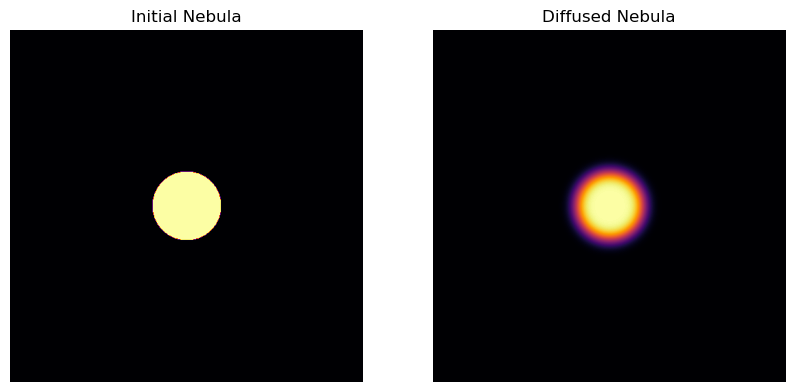

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# 初始化星云区域
def initialize_nebula(size, center, radius):
    x, y = np.ogrid[:size, :size]
    mask = (x - center[0])**2 + (y - center[1])**2 < radius**2
    return mask.astype(float)

# 模拟气体扩散
def diffuse_gas(image, sigma):
    return gaussian_filter(image, sigma=sigma)

# 设置参数
size = 512
center = (size // 2, size // 2)
initial_radius = 50
diffusion_sigma = 10

# 初始化星云
nebula = initialize_nebula(size, center, initial_radius)

# 运行气体扩散模拟
diffused_nebula = diffuse_gas(nebula, diffusion_sigma)

# 绘制图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Initial Nebula')
plt.imshow(nebula, cmap='inferno')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Diffused Nebula')
plt.imshow(diffused_nebula, cmap='inferno')
plt.axis('off')

plt.show()


TypeError: only length-1 arrays can be converted to Python scalars

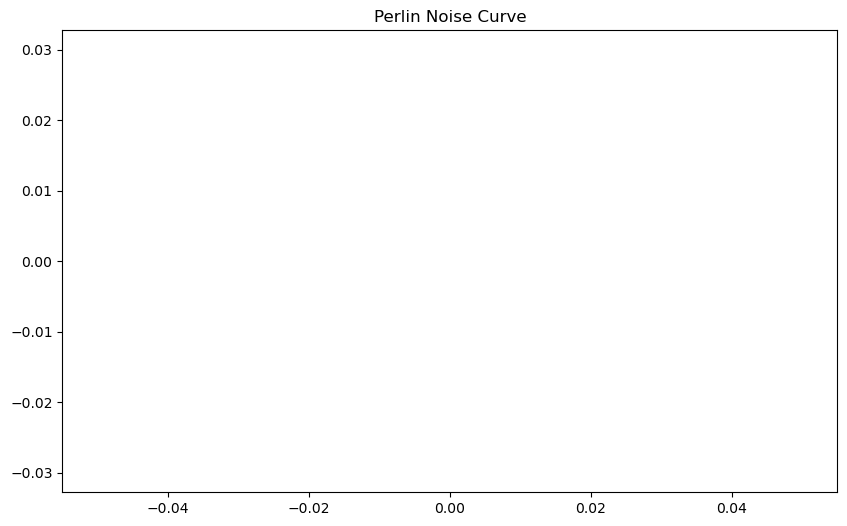

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class Noise:
    def __init__(self, octaves=1):
        self.p = np.random.randint(0, 256, 512, dtype=np.uint8)
        self.octaves = octaves

    def lerp(self, t, a, b):
        return a + t * (b - a)

    def grad2d(self, i, x, y):
        v = x if (i & 1) == 0 else y
        return -v if (i & 2) == 0 else v

    def noise2d(self, x2d, y2d):
        X = int(x2d) & 255
        Y = int(y2d) & 255
        x = x2d - int(x2d)
        y = y2d - int(y2d)
        fx = (3 - 2 * x) * x ** 2
        fy = (3 - 2 * y) * y ** 2
        p0 = self.p[X] + Y
        p1 = self.p[X + 1] + Y
        return self.lerp(
            fy,
            self.lerp(
                fx,
                self.grad2d(self.p[p0], x, y),
                self.grad2d(self.p[p1], x - 1, y)
            ),
            self.lerp(
                fx,
                self.grad2d(self.p[p0 + 1], x, y - 1),
                self.grad2d(self.p[p1 + 1], x - 1, y - 1)
            )
        )

    def noise(self, x, y):
        e = 1
        k = 1
        s = 0
        for i in range(self.octaves):
            e *= 0.5
            s += e * (1 + self.noise2d(k * x, k * y)) / 2
            k *= 2
        return s

def generate_curve(noise, num_curves=300):
    plt.figure(figsize=(10, 6))
    plt.axis('equal')
    plt.title('Perlin Noise Curve')

    for i in range(num_curves):
        j = np.arange(-101, 100)
        h = noise.noise(100 + j * 0.01, 100 + i * 0.01)
        plt.plot(j, 0.1 * i + h * 200 - 100, color='black', alpha=0.33)

    plt.show()

# Create a Noise instance
perlin = Noise(octaves=3)
generate_curve(perlin)


In [ ]:
n = 2500


In [1]:
# simplex noise
# perlin noise
# OpenSimplex noise
# Simulation noise ?
# Value noise
# Worley noise
# diamond square
# heightmap

https://en.wikipedia.org/wiki/Procedural_generation#:~:text=In%20computing%2C%20procedural%20generation%20%28sometimes%20shortened%20as%20proc-gen%29,algorithms%20coupled%20with%20computer-generated%20randomness%20and%20processing%20power.

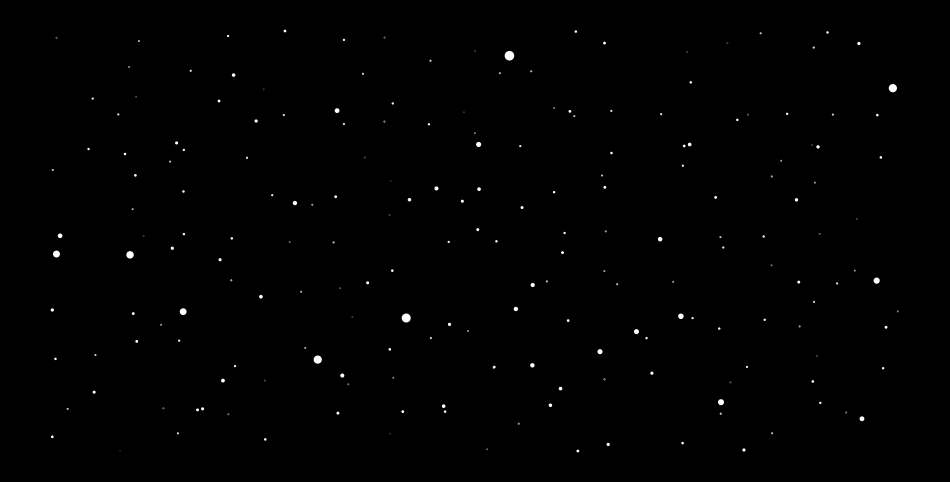

In [8]:
# generate starlight
import numpy as np
import torch
from matplotlib import pyplot as plt
shape = (20,10)

# Make rectangular grid
x, y = np.arange(shape[0]), np.arange(shape[1])
x, y = np.meshgrid(x, y, indexing="ij")

# Generate noise: random displacements r at random angles phi
np.random.seed(0)
phi = np.random.uniform(0, 2 * np.pi, x.shape)
r = np.random.uniform(0, 0.5, x.shape)

# Shrink star size to keep it within its cell.
# Also, we want more small stars - for the background effect.
# To do that we rescale displacements: r -> 1/2 - 0.001 / r.
r = np.clip(0.5 - 1e-3 / r, 0, None)
size = 200 * (0.5 - r) - 0.4

# Convert r and phi to cartesian coordinates using the Euler formula.
z = r * np.exp(1j * phi)
dx, dy = z.real, z.imag
x, y = x + dx, y + dy

plt.figure(figsize=(12,6), facecolor="black")
plt.scatter(x, y, c="white", s=size)
plt.axis("off")
plt.show()

In [2]:
import filepath

In [21]:
from panda3d_game.app import *

In [29]:
from panda3d.core import (
    Geom,
    GeomNode,
    GeomTriangles,
    GeomVertexData,
    GeomVertexFormat,
    GeomVertexWriter,
    GeomEnums
)
from panda3d.core import (
    NodePath,
    CardMaker,
    Texture,
    CardMaker,
    Point2,
    Vec3
)
from art.basic import *
def create_cylinder_node(
    name:str,
    lat_res:int,
    lon_res:int,
    # scale:float=1,
    geom_type: GeomEnums = Geom.UH_static
) -> GeomNode:
    node = GeomNode("CldrNd."+name)
    geom = create_cylinder(
        name, lat_res, lon_res,
        # scale, 
        geom_type
    )
    node.addGeom(geom)
    return node

# TODO: fix 

def create_cylinder(
    name:str,
    lat_res:int,
    lon_res:int,
    scale:float=1,
    geom_type: GeomEnums = Geom.UH_static
) -> Geom:
    assert isinstance(lat_res, int) \
        and lat_res > 0, \
        "lat_res should be postive int, got {}".format(lat_res)
    name_cylinder = "Cldr.{}".format(name)
    # vertex_size = (lon_res, lat_res)
    # color = GeomVertexWriter(vdata, "color")
    # vertex: n_lat * n_lon * 3
    axis_coord_theta = torch.arange(0,1,step=1/lon_res) * 2 * np.pi
    # axis_coord_phi = torch.arange(0,1,step=1/lat_res) * 2 * np.pi
    axis_coord_z = torch.arange(0,1,step=1/lat_res)
    vertex_coord_theta, vertex_coord_z = torch.meshgrid(
        axis_coord_theta,axis_coord_z,
        indexing='ij'
    )
    # vertex_coord_r = torch.cos(vertex_coord_phi)
    vertex_coord_r = 1
    # vertex_coord_z = torch.sin(vertex_coord_phi)
    # vertex_coord_z = 
    vertex_coord_x = torch.cos(vertex_coord_theta) * vertex_coord_r
    vertex_coord_y = torch.sin(vertex_coord_theta) * vertex_coord_r
    vertex_coord_xyz = torch.concat([
        vertex_coord_x.unsqueeze(-1),
        vertex_coord_y.unsqueeze(-1),
        vertex_coord_z.unsqueeze(-1)
    ], dim=-1)

    geom = uv_curve_surface(
        name=name_cylinder,
        coord_mat=vertex_coord_xyz,
        is_u_loop=True,
        is_v_loop=False, 
        geom_type = geom_type
    )
    
    return geom

class StarCylinder(ControlShowBase):
    def __init__(self):
        ContextShowBase.__init__(self)
        ControlShowBase.__init__(self)
        self.cylinder = create_cylinder_node("1", 12,12)
        self.rdr_scene.attachNewNode(self.cylinder)
        npth = NodePath(self.cylinder)
        npth.setColor((1, 1, 1, 1))
        npth.setTwoSided(True)
        

    

In [30]:
if __name__ == "__main__":
    from ui.abstract_ui import InterfacePlaceHolder
    import builtins
    import traceback
    # interface = InterfacePlaceHolder()
    try:
        with StarCylinder() as app:
            # console = PhyscRoomConsole(showbase=app)
            # interface = CMDInterface(console=console)
            # .start()
            # start a thread of app
            app.run()
    except Exception as e:
        print(e)
        print(traceback.format_exc())
    finally:
        if hasattr(builtins, 'base'):
            builtins.base.destroy()
        interface.join()


Known pipe types:
  glxGraphicsPipe
(all display modules loaded.)
:audio(error): Couldn't open default OpenAL device
:audio(error): OpenALAudioManager: No open device or context
:audio(error):   OpenALAudioManager is not valid, will use NullAudioManager
:audio(error): Couldn't open default OpenAL device
:audio(error): OpenALAudioManager: No open device or context
:audio(error):   OpenALAudioManager is not valid, will use NullAudioManager


init ContextShowBase
---set ref---:render,<class 'panda3d.core.NodePath'>
---<__main__.StarCylinder object at 0x7f36f7fed150> run(), at 2024-09-27 12:01:38.603320---
---<__main__.StarCylinder object at 0x7f36f7fed150> destroy at 2024-09-27 12:01:49.049103---
---<__main__.StarCylinder object at 0x7f36f7fed150> destroyed at 2024-09-27 12:01:49.049580, exit---


SystemExit: 